<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Clustering_DBSCAN_EpsilonValue_min_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning - Clustering

A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group.

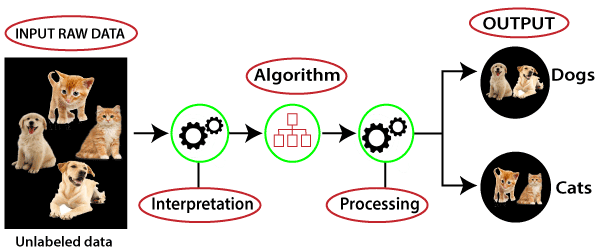

##DBSCAN Clustering -

**Density Based Spatial Clustering of Applications with Noise.**

It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: epsilon and minPoints. 

    Epsilon - radius of the circle to be created around each data point to check the density. 
    minPoints - minimum number of data points required inside that circle for that data point to be classified as a Core point.

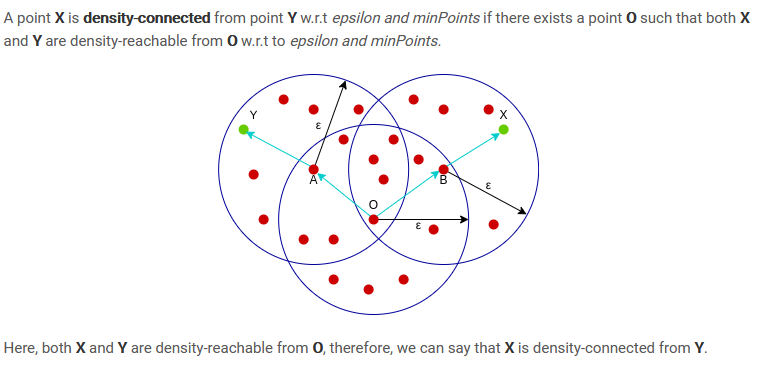

DBSCAN creates circle of epsilon radius around every data point and classify them into :

    Core — This is a point that has at least m points within distance n from itself.
    Border — This is a point that has at least one Core point at a distance n.
    Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself. 



In [3]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

###DBSCAN Clustering on Mall Customers data



In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df=df[['Annual_Income_(k$)','Spending_Score']]

Text(0.5, 1.0, 'Annual_Income_(k$) vs Spending_Score')

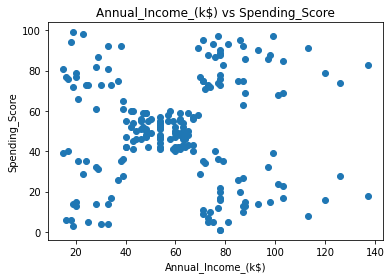

In [7]:
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'])
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Annual_Income_(k$) vs Spending_Score")

Obtain Distances using NearestNeighbours and plot to get Epsilon value -

In [41]:
#Trying for 2 nearest neighbours
n=NearestNeighbors(n_neighbors=2)
n_fit=n.fit(df)
distance,_=n_fit.kneighbors(df)
distance=np.sort(distance,axis=0)
distance=distance[:,1]

Text(0, 0.5, 'Epsilon')

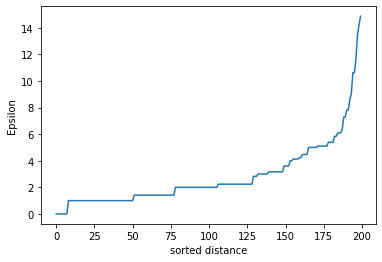

In [42]:
plt.plot(distance)
plt.xlabel("sorted distance")
plt.ylabel("Epsilon")

Conclusion :

    The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 5 in this case. 

In [49]:
# Epsilon = 5
#min samples = Dimension of data + 1 = 2+1=3

model=DBSCAN(eps=5,min_samples=3)
model.fit(df)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

Text(0, 0.5, 'Spending_Score')

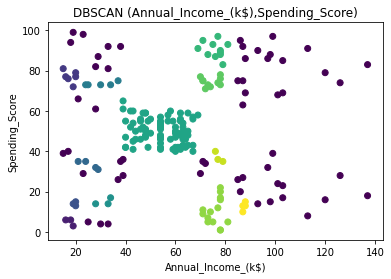

In [50]:
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'],c=model.labels_)
plt.title("DBSCAN (Annual_Income_(k$),Spending_Score)")
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")

Conclusion :

    We can observe the clusters are perfectly matched for densed data. Whereas lightly distributed data doesn't fit in clusters perfectly.

###DBSCAN Clsutering on iris data

In [51]:
df = pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'sepal_length vs sepal_width')

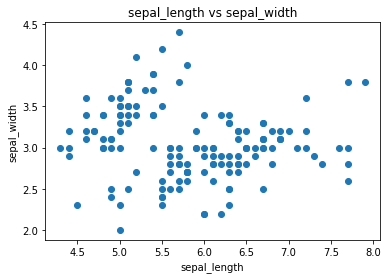

In [52]:
df=df[['sepal_length','sepal_width']]

plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("sepal_length vs sepal_width")

In [ ]:
n=NearestNeighbors(n_neighbors=2)
n_fit=n.fit(df)
distance,_=n_fit.kneighbors(df)
distance=np.sort(distance,axis=0)
distance=distance[:,1]

Text(0, 0.5, 'Epsilon')

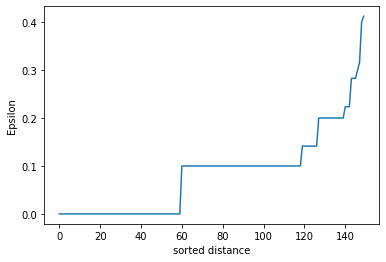

In [53]:
plt.plot(distance)
plt.xlabel("sorted distance")
plt.ylabel("Epsilon")

Conclusion :

    The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 0.3 in this case.

In [ ]:
model=DBSCAN(eps=0.3,min_samples=6)
model.fit(df)

Text(0, 0.5, 'sepal_width')

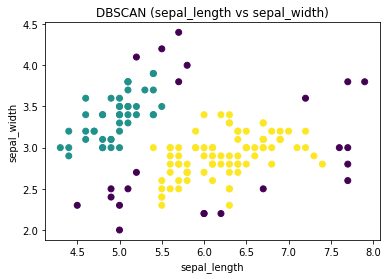

In [69]:

plt.scatter(df['sepal_length'], df['sepal_width'],c=model.labels_)
plt.title("DBSCAN (sepal_length vs sepal_width)")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

Conclusion :

    We can observe the clusters are perfectly matched for densed data. Whereas lightly distributed data doesn't fit in clusters perfectly.